In [63]:
biomass_flux = 0.1 # kg/s
observation_period = 365* 24 * 60 * 60 # seconds
pyrolysis_type = 'conv_woodsawdust@520degC_40degC/min' # select pyr

# Output mass ratios depend on many different parameters and control setting. 
# In this first approach we use mass ratios from literature: 
mass_ratios = {'fast_pyrolysis' : {'gas': 0.5 , 'oil': 0.25, 'char': 0.25},
               'slow_pyrolysis' : {'gas': 0   , 'oil': 0   , 'char': 1.0},
               'pine@500degC':   {'gas': 0.12, 'oil': 0.55, 'char': 0.33}, # https://www.researchgate.net/publication/236999893_Emergy_synthesis_of_a_pyrolysis_process
               # https://eprints.whiterose.ac.uk/80749/1/AS%20RE-SUBMITTED-MARCH%202014.pdf
               'conv_woodsawdust@520degC_5degC/min': {
                    'gas' : 0.2061, 'oil': 0.5394, 'char': 0.2545},
               'conv_woodsawdust@520degC_20degC/min': {
                    'gas' : 0.1879, 'oil': 0.5909, 'char': 0.2212},
               'conv_woodsawdust@520degC_40degC/min': {
                    'gas' : 0.2061, 'oil': 0.5818, 'char': 0.2121},
               'conv_woodsawdust@350degC_20degC/min': {
                    'gas' : 0.1485, 'oil': 0.4667, 'char': 0.3848},
               'conv_woodsawdust@310degC_20degC/min': {
                    'gas' :  0.861, 'oil': 0.3152, 'char': 0.5970},
               'microwave_woodsawdust@200degC_600W': {
                    'gas' :  0.839, 'oil': 0.4323, 'char': 0.4839},
               'microwave_woodsawdust@200degC_900W': {
                    'gas' :  0.903, 'oil': 0.4581, 'char': 0.4516},
               'microwave_woodsawdust@200degC_1200W': {
                    'gas' :  0.968, 'oil': 0.4710, 'char': 0.4323},
               }

gas_flux = biomass_flux * mass_ratios[pyrolysis_type]['gas']
oil_flux = biomass_flux * mass_ratios[pyrolysis_type]['oil']
char_flux = biomass_flux * mass_ratios[pyrolysis_type]['char']

gas_mass = gas_flux * observation_period
oil_mass = oil_flux * observation_period
char_mass = char_flux * observation_period

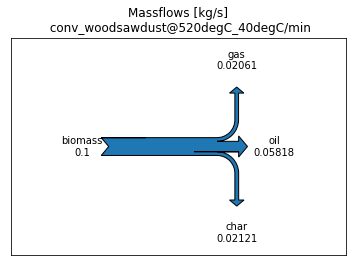

In [64]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

Sankey(flows=[biomass_flux, -gas_flux, -oil_flux, -char_flux],
       labels=['biomass', 'gas', 'oil', 'char'],
       orientations=[0, 1, 0, -1]).finish()
plt.title(f"Massflows [kg/s]\n {pyrolysis_type}");